# Tarea Semanal 1: Sintesis de señales
## Facundo Ivan CARRANZA

In [1]:
#%% Importo librerias
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp

## Definicion de funciones

#### Aqui tengo las funciones para sintetizar una funcion senoidal y una cuadrada, la cuadrada tiene un vpp de 2 V, desde -1 a 1 V. 1 la senoidal con una amplitud de 1 V, es importante utilizar el .reshape para poder mantener la forma de la columna y facilitar los calculos

In [2]:
def funcion_sen(vmax=1, dc=0, ff=1, ph=0, nn=1000, fs=1000):
    """
    Genero una señal senoidal con los siguientes parámetros:
        vmax: Amplitud máxima (volts)
        dc: Valor medio / Offset (volts)
        ff: Frecuencia de la señal (Hz)
        ph: Fase (radianes)
        nn: Número de muestras
        fs: Frecuencia de muestreo (Hz)
    
    Retorno:
        tt: Vector de tiempo (nn x 1)
        xx: Señal senoidal (nn x 1)
    """
    tt = np.arange(0, nn/fs, 1/fs).reshape(-1, 1)
    "Utilice el reshape para asegurar la forma de columna"
    xx = (dc + vmax * np.sin(2 * np.pi * ff * tt + ph)).reshape(-1, 1)
    return tt, xx

# Función para generar señal cuadrada (square wave)
def funcion_cuadrada(vmax=1, dc=0, ff=1, ph=0, nn=1000, fs=1000):
    """
    Genero una señal cuadrada con los siguientes parámetros:
        vmax: Amplitud máxima (volts)
        dc: Valor medio / Offset (volts)
        ff: Frecuencia de la señal (Hz)
        ph: Fase (radianes)
        nn: Número de muestras
        fs: Frecuencia de muestreo (Hz)
    
    Retorna:
        tt: Vector de tiempo (nn x 1)
        xx: Señal cuadrada (nn x 1)
    """
    tt = np.arange(0, nn/fs, 1/fs).reshape(-1, 1)
    # Generamos la senoidal base
    seno = np.sin(2 * np.pi * ff * tt + ph)
    # La señal cuadrada se obtiene al umbralizar la senoidal
    xx = dc + vmax * np.where(seno >= 0, 1, -1) 
    
    """
    Utilice la funcion np.where para tomar la senoidal creada arriba
    para transformarla en una señal cuadrada
    """
    
    return tt, xx.reshape(-1, 1)

## Sintesis de señales y calculos necesarios

#### En esta fase utilizamos la funciones previamente definidas con el objetivo de crear las señales pedidas, con su respectiva frecuencia, tension maxima, offset numero de meustras y frecuencia de muestreo. 
#### Ademas utilizamos las formulas paraa el calculo de el tiempo entre muestras, la potencia y energia.
#### Es util ver que excepto la ultima (el pulso) todas las demas señales son de potencia por su periodicidad. 

In [3]:
#%%Una señal sinusoidal de 2KHz.

fs = 40000   # Frecuencia de muestreo
f  = 2000    # Frecuencia señal
nn = 81     # número de muestras

tt, Sin_2k = funcion_sen(vmax=1, dc=0, ff=f, ph=0, nn=nn, fs=fs)
tm_1= 1/fs 
pot_1 = np.sum(Sin_2k**2)/nn

#%%Misma señal amplificada y desfazada en π/2.

tt, Sin_amp = funcion_sen(vmax=10, dc=0, ff=f, ph=np.pi/2, nn=nn, fs=fs)
tm_2= 1/fs
pot_2 = np.sum(Sin_amp**2)/nn

#%%Misma señal modulada en amplitud por otra señal sinusoidal de la mitad de la frecuencia.

tt_2, portadora = funcion_sen(vmax=1, dc=0, ff=f/2, ph=0, nn=nn, fs=fs)

final = portadora * Sin_2k
tm_3 = 1/fs
pot_3= np.sum(final**2)/len(final)

#%%Señal anterior recortada al 75% de su amplitud.

Sin_clip = np.clip(Sin_2k, -0.75, 0.75)
tm_4 = 1/fs
pot_4=np.sum(Sin_clip**2)/len(Sin_clip)

#%%Una señal cuadrada de 4KHz.

tt_3 ,Cuadrada = funcion_cuadrada(vmax=1, dc=0, ff=4000, ph=0, nn=nn, fs=fs)
tm_5 = 1/fs
pot_5=np.sum(Cuadrada**2)/len(Cuadrada)

#%%Un pulso rectangular de 10ms

fsr = 40000  # frecuencia de muestreo en Hz
tt_4 = np.arange(0, 0.03, 1/fsr)  # tiempo de 0 a 50 ms
t_start = 0.015  # tiempo de inicio del pulso (15 ms)
duracion = 0.01  # duración del pulso (10 ms)

# Pulso rectangular de 10 ms, desde t=0 hasta t=0.01
pulso = np.zeros_like(tt_4)           # inicializo todo en 0
pulso[(tt_4 >= t_start) & (tt_4 < t_start + duracion)] = 1
tm_6=1/fsr
en_6=np.sum(pulso**2) * tm_6

## Graficos

#### Durante esta etapa busque graficar todas las señales y utilice el subplot para poder verlas al mismo tiempo, ademas añadi los valores de potencia, numero de muestras y tiempo entre muestras.
#### Es util ver que para la señal 6 nuestro codigo nos permite elegir el momento donde el pulso comienza, recordando que la duracion del mismo esta dada por la consigna (10 ms)

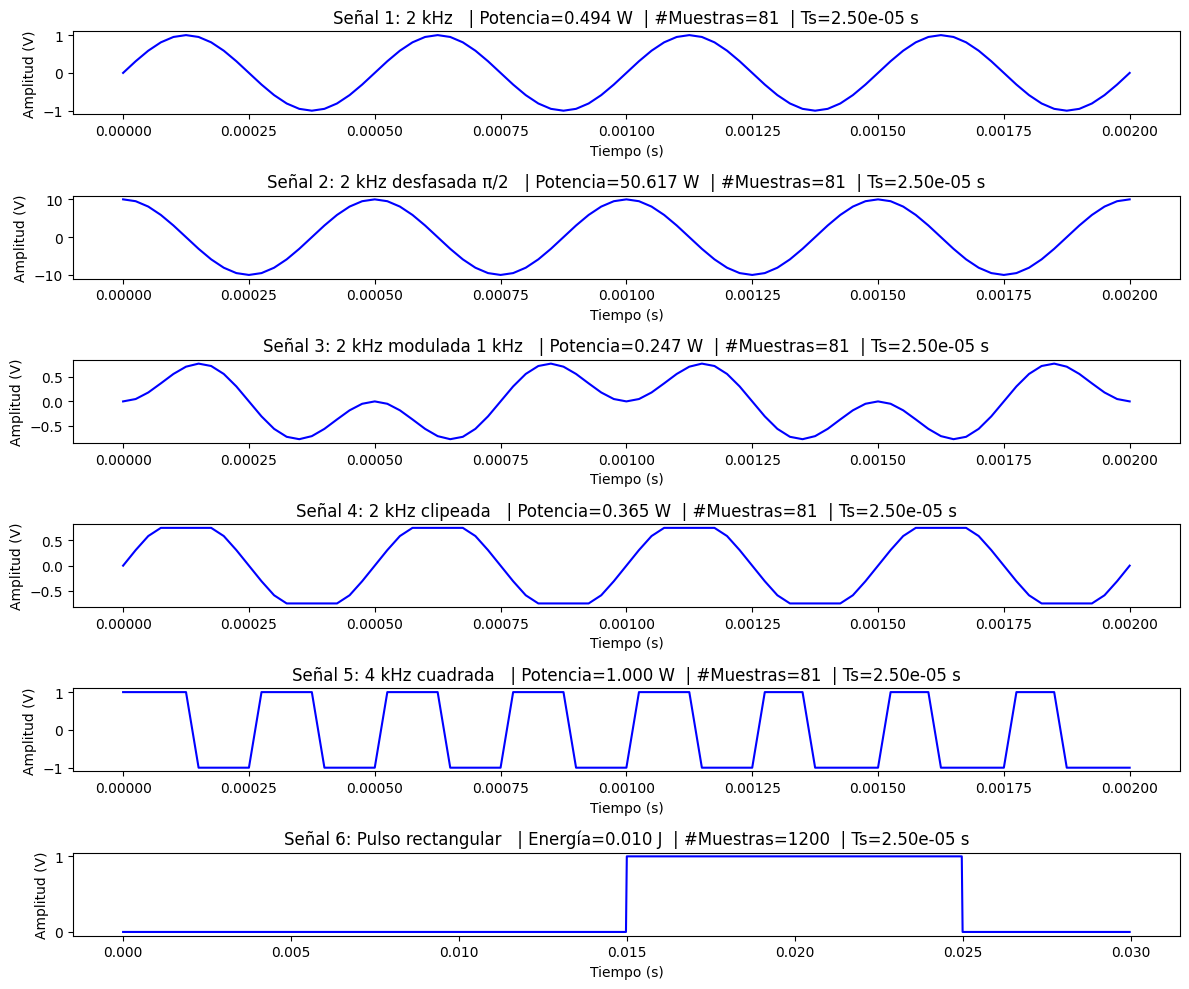

In [4]:
plt.figure(figsize=(12,10))

# Señal 1
plt.subplot(6,1,1)
plt.plot(tt, Sin_2k, color='blue')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.title(f"Señal 1: 2 kHz   | Potencia={pot_1:.3f} W  | #Muestras={nn}  | Ts={tm_1:.2e} s")

# Señal 2
plt.subplot(6,1,2)
plt.plot(tt, Sin_amp, color='blue')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.title(f"Señal 2: 2 kHz desfasada π/2   | Potencia={pot_2:.3f} W  | #Muestras={nn}  | Ts={tm_2:.2e} s")

# Señal 3
plt.subplot(6,1,3)
plt.plot(tt_2, final, color='blue')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.title(f"Señal 3: 2 kHz modulada 1 kHz   | Potencia={pot_3:.3f} W  | #Muestras={len(final)}  | Ts={tm_3:.2e} s")

# Señal 4
plt.subplot(6,1,4)
plt.plot(tt, Sin_clip, color='blue')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.title(f"Señal 4: 2 kHz clipeada   | Potencia={pot_4:.3f} W  | #Muestras={len(Sin_clip)}  | Ts={tm_4:.2e} s")

# Señal 5
plt.subplot(6,1,5)
plt.plot(tt_3, Cuadrada, color='blue')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.title(f"Señal 5: 4 kHz cuadrada   | Potencia={pot_5:.3f} W  | #Muestras={len(Cuadrada)}  | Ts={tm_5:.2e} s")

# Señal 6
plt.subplot(6,1,6)
plt.plot(tt_4, pulso, color='blue')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.title(f"Señal 6: Pulso rectangular   | Energía={en_6:.3f} J  | #Muestras={len(pulso)}  | Ts={tm_6:.2e} s")

plt.tight_layout()
plt.show()

## Verificacion de ortogonalidad

#### Aca realizamos el producto interno entre la primer señal y las demas, con el objetivo de verificar su ortogonalidad, si el resultado es 0 las señales son ortogonales.

In [5]:
pi_2 = np.dot(Sin_2k.T, Sin_amp)
pi_3 = np.dot(Sin_2k.T, final)
pi_4 = np.dot(Sin_2k.T, Sin_clip)
pi_5 = np.dot(Sin_2k.T, Cuadrada)
tt, Sin_2k_ = funcion_sen(vmax=1, dc=0, ff=f, ph=0, nn=1200, fs=fs)
pi_6 = np.dot(Sin_2k_.T, pulso)
print(pi_2)
print(pi_3)
print(pi_4)
print(pi_5)
print(pi_6)

[[7.05829726e-14]]
[[5.32907052e-15]]
[[34.17661022]]
[[2.]]
[3.33066907e-16]


#### Como vemos en los resultados las señales 2, 3 y la 6 son ortogonales con la señal 1 ya que su valor da muy cercano a 0.

## Graficos de correlacion y autocorrelacion

#### En esta fase realizamos la correlacion entre la señal 1 y las demas, asi como tambien la autocorrelacion con ella misma. Esto busca determinar que tanto se parece dos señales. En este caso reconozco que cometi un error y la correlacion con la señal 6 me quedo mal, no se si es un problema con las columnas de python o que, agradeceria una devolucion con respecto a eso y perdon por el error.

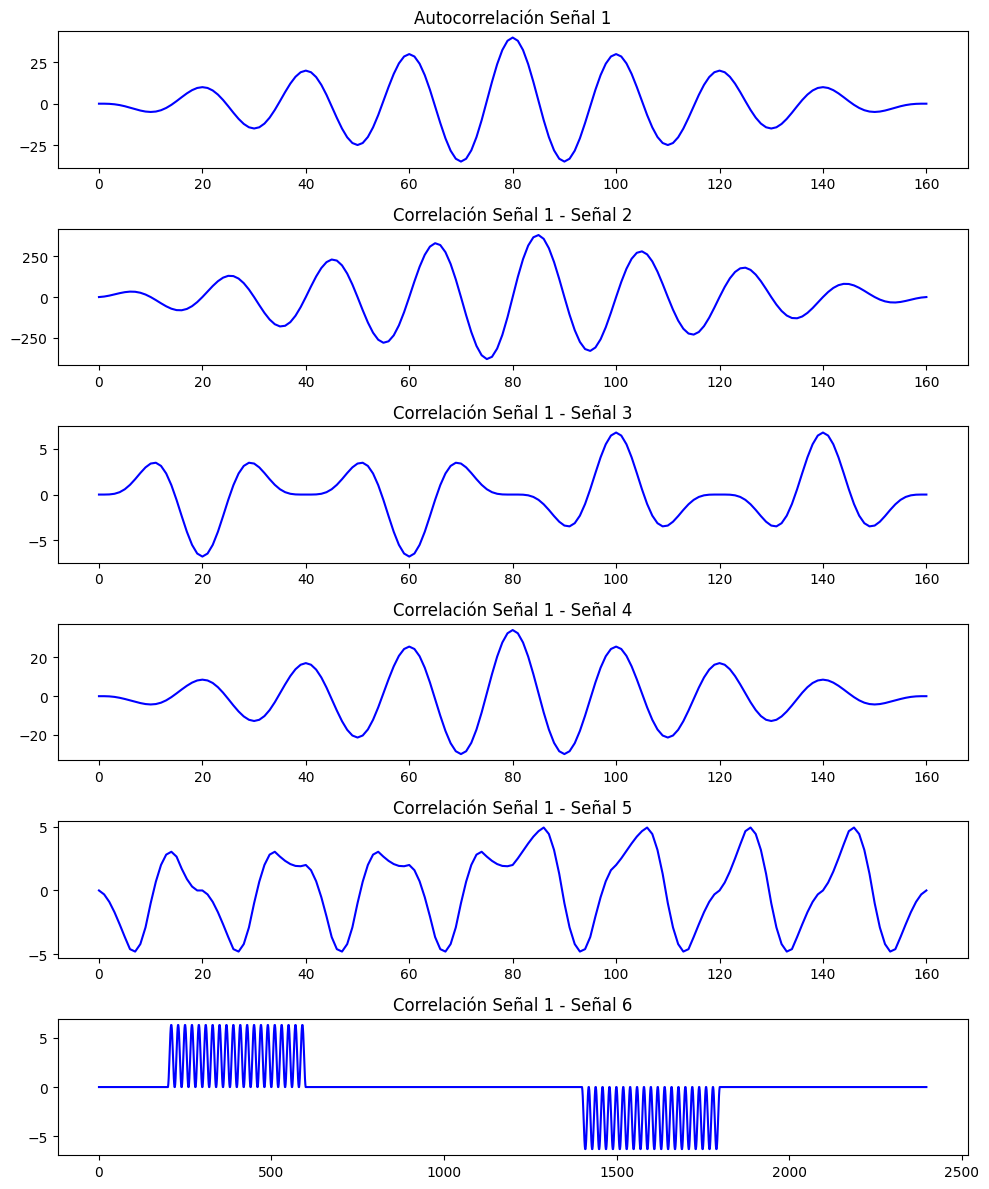

In [6]:
Sin_2k_ = Sin_2k_.ravel()
pulso   = pulso.ravel()

plt.figure(figsize=(10,12))

plt.subplot(6,1,1)
plt.plot(sp.correlate(Sin_2k, Sin_2k, mode='full'), color='blue')
plt.title("Autocorrelación Señal 1")

plt.subplot(6,1,2)
plt.plot(sp.correlate(Sin_2k, Sin_amp, mode='full'), color='blue')
plt.title("Correlación Señal 1 - Señal 2")

plt.subplot(6,1,3)
plt.plot(sp.correlate(Sin_2k, final, mode='full'), color='blue')
plt.title("Correlación Señal 1 - Señal 3")

plt.subplot(6,1,4)
plt.plot(sp.correlate(Sin_2k, Sin_clip, mode='full'), color='blue')
plt.title("Correlación Señal 1 - Señal 4")

plt.subplot(6,1,5)
plt.plot(sp.correlate(Sin_2k, Cuadrada, mode='full'), color='blue')
plt.title("Correlación Señal 1 - Señal 5")

plt.subplot(6,1,6)
plt.plot(sp.correlate(Sin_2k_, pulso, mode='full'), color='blue')
plt.title("Correlación Señal 1 - Señal 6")


plt.tight_layout()
plt.show()

## Verificacion de identidad trigonometrica

#### Pude verificar la identidad y saber que se cumple para toda frecuencia

In [7]:
tt_1, sen_alfa = funcion_sen(vmax=1, dc=0, ff=2000, ph=0, nn=81, fs=40000)
tt_2, sen_beta = funcion_sen(vmax=1, dc=0, ff=1000, ph=0, nn=81, fs=40000)

tt_3, cos_alfa_menos_beta = funcion_sen(vmax=1, dc=0, ff=1000, ph=np.pi/2, nn=81, fs=40000)
tt_4, cos_alfa_mas_beta   = funcion_sen(vmax=1, dc=0, ff=3000, ph=np.pi/2, nn=81, fs=40000)


identidad = 2*sen_alfa*sen_beta - cos_alfa_menos_beta + cos_alfa_mas_beta

if max(abs(identidad)) < 1e-10:
    print("✅ La identidad se cumple para toda frecuencia !")
else:
    print("❌ La identidad NO se cumple")

✅ La identidad se cumple para toda frecuencia !


##### Como conclusion y respondiendo las preguntas planteadas, creo que no tuve grandes problemas, me confunde un poco la manera de hacer cuentas de numpy y tuve algunos problemas con el tamaño de los vectores a la hora de hacer cuentas, tengo algunas dudas pero mas que nada teoricas con respecto al muestreo que voy a consultar en la clase. 
##### Use IA para algunas partes puntuales ya que tengo algo de experiencia en python, lo use mas que nada a la hora de utilizar la correlacion ya que no entendi bien como hacerlo y me ayudo principalmente a la hora de hacer la correlacion entre la senoidal y el pulso porque tuve problemas con los tamaños.
